[View in Colaboratory](https://colab.research.google.com/github/huyhoang17/Colab_Temporary/blob/master/[Test]Semantic_Search.ipynb)

In [9]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# get glove word embedding
# !wget http://nlp.stanford.edu/data/glove.6B.zip -P drive/My\ Drive/workspace/Semantic_Search/dataset

In [10]:
!ls -la drive/My\ Drive/workspace/Semantic_Search/dataset

total 80
drwx------ 2 root root 4096 Sep 26 07:32 aeroplane
drwx------ 2 root root 4096 Sep 26 07:32 bicycle
drwx------ 2 root root 4096 Sep 26 07:32 bird
drwx------ 2 root root 4096 Sep 26 07:32 boat
drwx------ 2 root root 4096 Sep 26 07:33 bottle
drwx------ 2 root root 4096 Sep 26 07:33 bus
drwx------ 2 root root 4096 Sep 26 07:33 car
drwx------ 2 root root 4096 Sep 26 07:33 cat
drwx------ 2 root root 4096 Sep 26 07:33 chair
drwx------ 2 root root 4096 Sep 26 07:34 cow
drwx------ 2 root root 4096 Sep 26 07:34 diningtable
drwx------ 2 root root 4096 Sep 26 07:34 dog
drwx------ 2 root root 4096 Sep 26 07:34 horse
drwx------ 2 root root 4096 Sep 26 07:34 motorbike
drwx------ 2 root root 4096 Sep 26 07:35 person
drwx------ 2 root root 4096 Sep 26 07:35 pottedplant
drwx------ 2 root root 4096 Sep 26 07:35 sheep
drwx------ 2 root root 4096 Sep 26 07:35 sofa
drwx------ 2 root root 4096 Sep 26 07:36 train
drwx------ 2 root root 4096 Sep 26 07:36 tvmonitor


In [13]:
!head drive/My\ Drive/workspace/Semantic_Search/glove/glove.6B.300d.txt

the 0.04656 0.21318 -0.0074364 -0.45854 -0.035639 0.23643 -0.28836 0.21521 -0.13486 -1.6413 -0.26091 0.032434 0.056621 -0.043296 -0.021672 0.22476 -0.075129 -0.067018 -0.14247 0.038825 -0.18951 0.29977 0.39305 0.17887 -0.17343 -0.21178 0.23617 -0.063681 -0.42318 -0.11661 0.093754 0.17296 -0.33073 0.49112 -0.68995 -0.092462 0.24742 -0.17991 0.097908 0.083118 0.15299 -0.27276 -0.038934 0.54453 0.53737 0.29105 -0.0073514 0.04788 -0.4076 -0.026759 0.17919 0.010977 -0.10963 -0.26395 0.07399 0.26236 -0.1508 0.34623 0.25758 0.11971 -0.037135 -0.071593 0.43898 -0.040764 0.016425 -0.4464 0.17197 0.046246 0.058639 0.041499 0.53948 0.52495 0.11361 -0.048315 -0.36385 0.18704 0.092761 -0.11129 -0.42085 0.13992 -0.39338 -0.067945 0.12188 0.16707 0.075169 -0.015529 -0.19499 0.19638 0.053194 0.2517 -0.34845 -0.10638 -0.34692 -0.19024 -0.2004 0.12154 -0.29208 0.023353 -0.11618 -0.35768 0.062304 0.35884 0.02906 0.0073005 0.0049482 -0.15048 -0.12313 0.19337 0.12173 0.44503 0.25147 0.10781 -0.17716 0.0386

In [14]:
!wc -l drive/My\ Drive/workspace/Semantic_Search/glove/glove.6B.300d.txt

400000 drive/My Drive/workspace/Semantic_Search/glove/glove.6B.300d.txt


# Download Dataset

In [7]:
!pip install pyquery requests 

  Using cached https://files.pythonhosted.org/packages/09/c7/ce8c9c37ab8ff8337faad3335c088d60bed4a35a4bed33a64f0e64fbcf29/pyquery-1.4.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 5.8MB 4.9MB/s 
  Using cached https://files.pythonhosted.org/packages/7b/44/25b7283e50585f0b4156960691d951b05d061abf4a714078393e51929b30/cssselect-1.0.3-py2.py3-none-any.whl


In [40]:
from urllib.parse import urljoin

from pyquery import PyQuery
import os
import requests


class PascalSentenceDataSet():
    DATASET_DIR = 'drive/My Drive/workspace/Semantic_Search/dataset'
    PASCAL_DATASET_URL = 'http://vision.cs.uiuc.edu/pascal-sentences/'

    def __init__(self):
        self.url = PascalSentenceDataSet.PASCAL_DATASET_URL

    def download_images(self):
        dom = PyQuery(self.url)
        for img in dom('img').items():
            img_src = img.attr['src']
            category, img_file_name = os.path.split(img_src)
            
            # make category directories
            output_dir = os.path.join(
                PascalSentenceDataSet.DATASET_DIR, category
            )
            if not os.path.exists(output_dir):
                os.mkdir(output_dir)

            # download image
            output = os.path.join(output_dir, img_file_name)
            print(output)
            if img_src.startswith('http'):
                img_url = img_src
            else:
                img_url = urljoin(self.url, img_src)
            if os.path.isfile(output):
                print("Already downloaded, Skipping: %s" % output)
                continue
            print("Downloading: %s" % output)
            with open(output, 'wb') as f:

                while True:
                    try:
                        result = requests.get(img_url)
                        raw = result.content
                        if result.status_code == 200:
                            f.write(raw)
                            break
                        print("error occurred while fetching img")
                        print("retry...")
                    except OSError as e:
                        print(e)
                        break


# create instance
dataset = PascalSentenceDataSet()
# # download images
dataset.download_images()

drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_000716.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_000716.jpg
drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001227.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001227.jpg
drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001380.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001380.jpg
drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001448.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001448.jpg
drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001468.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001468.jpg
drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001801.jpg
Downloading: drive/My Drive/workspace/Semantic_Search/dataset/aeroplane/2008_001801.jpg
drive/My Drive/workspa

In [15]:
!pip install annoy h5py

    100% |████████████████████████████████| 634kB 15.2MB/s 
  Running setup.py bdist_wheel for annoy ... - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/96/af/26/f26df0a684b1e41ad8c56a13fc13e7a0a15a8a1a8b1cb0111a
Successfully built annoy


# Import Libs

In [16]:
import logging
import os
import json
import time

import h5py
import numpy as np

from annoy import AnnoyIndex
from keras import optimizers
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras.losses import cosine_proximity
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

logger = logging.getLogger()
logger.setLevel(logging.INFO)

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load glove vectors 

In [0]:
def load_glove_vectors(glove_dir, glove_name='glove.6B.300d.txt'):
    """
    Mostly from keras docs here https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
    Download GloVe vectors here http://nlp.stanford.edu/data/glove.6B.zip
    :param glove_name: name of pre-trained file
    :param glove_dir: directory in witch the glove file is located
    :return:
    """
    f = open(os.path.join(glove_dir, glove_name))
    embeddings_index = {}
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    print('Found %s word vectors.' % len(embeddings_index))
    return embeddings_index

In [20]:
word_vectors = load_glove_vectors("drive/My Drive/workspace/Semantic_Search/glove")

Found 400000 word vectors.


In [21]:
len(word_vectors), type(word_vectors)

(400000, dict)

In [22]:
word_vectors['a'].shape

(300,)

In [23]:
!ls drive/My\ Drive/workspace/Semantic_Search/dataset

aeroplane  boat    car	  cow	       horse	  pottedplant  train
bicycle    bottle  cat	  diningtable  motorbike  sheep        tvmonitor
bird	   bus	   chair  dog	       person	  sofa


In [0]:
# rename folder
# !mv drive/My\ Drive/workspace/Semantic_Search/dataset/diningtable drive/My\ Drive/workspace/Semantic_Search/dataset/dining_table
# !mv drive/My\ Drive/workspace/Semantic_Search/dataset/pottedplant drive/My\ Drive/workspace/Semantic_Search/dataset/potted_plant
# !mv drive/My\ Drive/workspace/Semantic_Search/dataset/tvmonitor drive/My\ Drive/workspace/Semantic_Search/dataset/tv_monitor

In [24]:
!ls drive/My\ Drive/workspace/Semantic_Search/glove

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt


In [0]:
def load_paired_img_wrd(folder, word_vectors, use_word_vectors=True):
    class_names = [fold for fold in os.listdir(folder) if ".DS" not in fold]
    image_list = []
    labels_list = []
    paths_list = []
    for cl in class_names:
        splits = cl.split("_")
        if use_word_vectors:
            vectors = np.array([word_vectors[split] if split in word_vectors else np.zeros(shape=300) for split in splits])
            class_vector = np.mean(vectors, axis=0)
        subfiles = [f for f in os.listdir(folder + "/" + cl) if ".DS" not in f]

        for subf in subfiles:
            full_path = os.path.join(folder, cl, subf)
            img = image.load_img(full_path, target_size=(224, 224))
            x_raw = image.img_to_array(img)
            x_expand = np.expand_dims(x_raw, axis=0)
            x = preprocess_input(x_expand)
            image_list.append(x)
            if use_word_vectors:
                labels_list.append(class_vector)
            paths_list.append(full_path)
    img_data = np.array(image_list)
    img_data = np.rollaxis(img_data, 1, 0)
    img_data = img_data[0]

    return img_data, np.array(labels_list), paths_list

In [0]:
images, vectors, image_paths = load_paired_img_wrd('drive/My Drive/workspace/Semantic_Search/dataset', word_vectors, use_word_vectors=True)

In [27]:
images.shape

(1000, 224, 224, 3)

In [28]:
vectors.shape

(1000, 300)

In [29]:
len(image_paths)

1000

# Indexing the images

In [0]:
def load_headless_pretrained_model():
    """
    Loads the pretrained version of VGG with the last layer cut off
    :return: pre-trained headless VGG16 Keras Model
    """
    pretrained_vgg16 = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=pretrained_vgg16.input,
                  outputs=pretrained_vgg16.get_layer('fc2').output)
    return model

In [0]:
def generate_features(image_paths, model):
    """
    Takes in an array of image paths, and a trained model.
    Returns the activations of the last layer for each image
    :param image_paths: array of image paths
    :param model: pre-trained model
    :return: array of last-layer activations, and mapping from array_index to file_path
    """
    import time
    start = time.time()
    images = np.zeros(shape=(len(image_paths), 224, 224, 3))
    logging.info("Images shape: %s", images.shape)
    file_mapping = {i: f for i, f in enumerate(image_paths)}

    # We load all our dataset in memory because it is relatively small
    for i, f in enumerate(image_paths):
        img = image.load_img(f, target_size=(224, 224))
        x_raw = image.img_to_array(img)
        x_expand = np.expand_dims(x_raw, axis=0)
        images[i, :, :, :] = x_expand

    logger.info("%s images loaded" % len(images))
    inputs = preprocess_input(images)
    logger.info("Images preprocessed")
    images_features = model.predict(inputs)
    end = time.time()
    logger.info("Inference done, %s Generation time" % (end - start))
    return images_features, file_mapping

In [32]:
!ls -la drive/My\ Drive/workspace/Semantic_Search/

total 20
drwx------ 22 root root 4096 Sep 26 06:50 dataset
drwx------  2 root root 4096 Sep 26 07:27 glove
drwx------  2 root root 4096 Sep 26 06:13 models
drwx------  2 root root 4096 Sep 26 06:13 notebooks
drwx------  2 root root 4096 Sep 26 06:13 src


In [0]:
model_path = 'drive/My Drive/workspace/Semantic_Search/models'

In [0]:
def save_features(model_path, features_filename, features, mapping_filename, file_mapping):
    """
    Save feature array and file_item mapping to disk
    :param features_filename: path to save features to
    :param features: array of features
    :param mapping_filename: path to save mapping to
    :param file_mapping: mapping from array_index to file_path/plaintext_word
    """
    np.save(os.path.join(model_path, '%s.npy' % features_filename), features)
    with open(os.path.join(model_path, '%s.json' % mapping_filename), 'w') as index_file:
        json.dump(file_mapping, index_file)
    logger.info("Weights saved")

In [0]:
def load_features(model_path, features_filename, mapping_filename):
    """
    Loads features and file_item mapping from disk
    :param features_filename: path to load features from
    :param mapping_filename: path to load mapping from
    :return: feature array and file_item mapping to disk
    """
    images_features = np.load(os.path.join(model_path, '%s.npy' % features_filename))
    with open(os.path.join(model_path, '%s.json' % mapping_filename)) as f:
        index_str = json.load(f)
        file_index = {int(k): str(v) for k, v in index_str.items()}
    return images_features, file_index

In [36]:
generate_image_features = True
model = load_headless_pretrained_model()

553467904/553467096 [==============================] - 77s 0us/step


In [37]:
if generate_image_features:
    images_features, file_index = generate_features(image_paths, model)
else:
    images_features, file_index = load_features(model_path, features_path, file_mapping_path)

INFO:root:Images shape: (1000, 224, 224, 3)
INFO:root:1000 images loaded
INFO:root:Images preprocessed
INFO:root:Inference done, 23.06758189201355 Generation time


In [40]:
images_features.shape

(1000, 4096)

In [43]:
len(file_index), type(file_index)

(1000, dict)

In [44]:
save_features(model_path, "features", images_features, "mapping", file_index)

INFO:root:Weights saved


In [47]:
!ls drive/My\ Drive/workspace/Semantic_Search/models

features.npy  mapping.json


# Indexing images using Annoy lib

In [0]:
def index_features(features, n_trees=1000, dims=4096, is_dict=False):
    """
    Use Annoy to index our features to be able to query them rapidly
    :param features: array of item features
    :param n_trees: number of trees to use for Annoy. Higher is more precise but slower.
    :param dims: dimension of our features
    :return: an Annoy tree of indexed features
    """
    feature_index = AnnoyIndex(dims, metric='angular')
    for i, row in enumerate(features):
        vec = row
        if is_dict:
            vec = features[row]
        feature_index.add_item(i, vec)
    feature_index.build(n_trees)
    return feature_index

In [50]:
images_features.shape

(1000, 4096)

In [0]:
image_index = index_features(images_features)

In [53]:
dir(image_index)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'add_item',
 'build',
 'f',
 'get_distance',
 'get_item_vector',
 'get_n_items',
 'get_nns_by_item',
 'get_nns_by_vector',
 'load',
 'save',
 'set_seed',
 'unbuild',
 'unload',
 'verbose']

# Search image by image

In [0]:
def search_index_by_key(key, feature_index, item_mapping, top_n=10):
    """
    Search an Annoy index by key, return n nearest items
    :param key: the index of our item in our array of features
    :param feature_index: an Annoy tree of indexed features
    :param item_mapping: mapping from indices to paths/names
    :param top_n: how many items to return
    :return: an array of [index, item, distance] of size top_n
    """
    distances = feature_index.get_nns_by_item(key, top_n, include_distances=True)
    return [[a, item_mapping[a], distances[1][i]] for i, a in enumerate(distances[0])]

In [0]:
search_key = 200
results = search_index_by_key(search_key, image_index, file_index)

In [60]:
results

[[200,
  'drive/My Drive/workspace/Semantic_Search/dataset/bottle/2008_000112.jpg',
  0.0],
 [270,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_004635.jpg',
  0.9413784146308899],
 [296,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_007888.jpg',
  0.9977052807807922],
 [250,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_002201.jpg',
  1.0260730981826782],
 [799,
  'drive/My Drive/workspace/Semantic_Search/dataset/pottedplant/2008_006068.jpg',
  1.0308611392974854],
 [255,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_003622.jpg',
  1.0327216386795044],
 [256,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_002067.jpg',
  1.0328603982925415],
 [210,
  'drive/My Drive/workspace/Semantic_Search/dataset/bottle/2008_004795.jpg',
  1.0681318044662476],
 [283,
  'drive/My Drive/workspace/Semantic_Search/dataset/cat/2008_005386.jpg',
  1.0685951709747314],
 [446,
  'drive/My Drive/workspace/Semantic_Search/dataset/chair/

In [0]:
import matplotlib.image as mpimg

### Main Image

In [0]:
main_img = mpimg.imread('drive/My Drive/workspace/Semantic_Search/dataset/bottle/2008_000112.jpg')

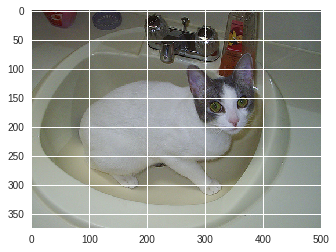

In [65]:
plt.imshow(main_img)

### Similar Images

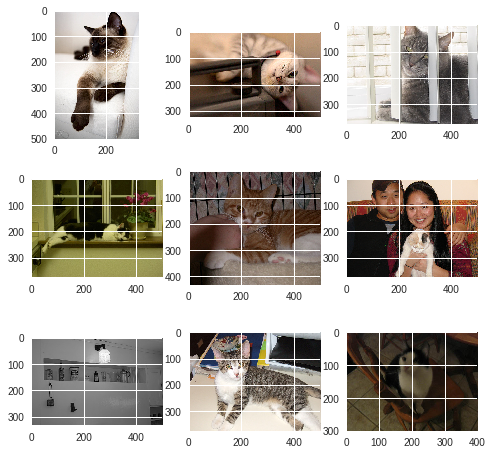

In [84]:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Re-weighting images

In [0]:
def get_weighted_features(class_index, images_features):
    """
    Use class weights to re-weigh our features
    :param class_index: Which Imagenet class index to weigh our features on
    :param images_features: Unweighted features
    :return: Array of weighted activations
    """
    class_weights = get_class_weights_from_vgg()
    target_class_weights = class_weights[:, class_index]
    weighted = images_features * target_class_weights
    return weighted

In [0]:
def get_class_weights_from_vgg(save_weights=False, filename='class_weights'):
    """
    Get the class weights for the final predictions layer as a numpy martrix, and potentially save it to disk.
    :param save_weights: flag to save to disk
    :param filename: filename if we save to disc
    :return: n_classes*4096 array of weights from the penultimate layer to the last layer in Keras' pretrained VGG
    """
    model_weights_path = os.path.join(os.environ.get('HOME'),
                                      '.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
    weights_file = h5py.File(model_weights_path, 'r')
    weights_file.get('predictions').get('predictions_W_1:0')
    final_weights = weights_file.get('predictions').get('predictions_W_1:0')

    class_weights = np.array(final_weights)[:]
    weights_file.close()
    if save_weights:
        np.save('%s.npy' % filename, class_weights)
    return class_weights

In [91]:
images_features.shape

(1000, 4096)

In [92]:
os.environ.get('HOME')

'/root'

In [94]:
!ls -la /root

total 80
drwx------ 1 root root 4096 Sep 26 08:25 .
drwxr-xr-x 1 root root 4096 Sep 26 05:47 ..
-rw------- 1 root root 2343 Sep 26 08:10 .bash_history
-rw-r--r-- 1 root root 3106 Oct 22  2015 .bashrc
drwx------ 1 root root 4096 Sep 26 05:55 .cache
drwx------ 1 root root 4096 Sep 26 05:55 .config
drwxr-xr-x 4 root root 4096 Sep 26 05:47 .forever
drwxr-xr-x 3 root root 4096 Sep 25 01:15 .gsutil
drwxr-xr-x 1 root root 4096 Sep 25 01:30 .ipython
drwx------ 2 root root 4096 Sep 25 01:36 .jupyter
drwxr-xr-x 3 root root 4096 Sep 26 08:24 .keras
drwx------ 3 root root 4096 Sep 26 05:47 .local
drwxr-xr-x 3 root root 4096 Sep 25 01:30 .node-gyp
drwxr-xr-x 4 root root 4096 Sep 25 01:30 .npm
drwx------ 3 root root 4096 Sep 26 08:25 .nv
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
drwxr-xr-x 3 root root 4096 Sep 25 01:30 .tox


In [0]:
# Index 284 is the index for the Siamese cat class in Imagenet
weighted_features = get_weighted_features(284, images_features)

In [0]:
weighted_index = index_features(weighted_features)
weighted_results = search_index_by_key(search_key, weighted_index, file_index)

### Main Image

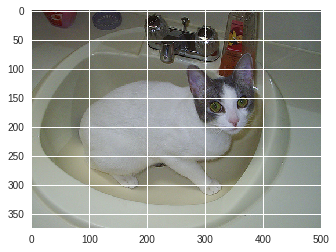

In [97]:
main_img = mpimg.imread('drive/My Drive/workspace/Semantic_Search/dataset/bottle/2008_000112.jpg')
plt.imshow(main_img)

### Similar Images

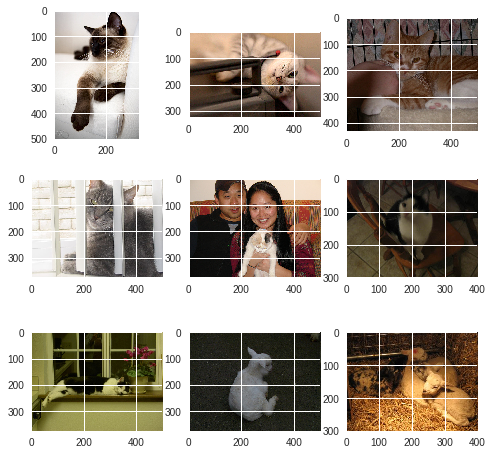

In [98]:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(weighted_results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [100]:
len(word_vectors)

400000

### Shifting to words

In [102]:
!pip install streamlit

    100% |████████████████████████████████| 1.5MB 14.1MB/s 
    100% |████████████████████████████████| 8.9MB 4.1MB/s 
    100% |████████████████████████████████| 215kB 28.3MB/s 
    100% |████████████████████████████████| 133kB 32.3MB/s 
    100% |████████████████████████████████| 4.7MB 7.9MB/s 
    100% |████████████████████████████████| 2.0MB 17.0MB/s 
    100% |████████████████████████████████| 552kB 7.0MB/s 
    100% |████████████████████████████████| 61kB 23.7MB/s 
    100% |████████████████████████████████| 81kB 24.0MB/s 
  Running setup.py bdist_wheel for enum-compat ... - done
  Stored in directory: /root/.cache/pip/wheels/b1/69/f4/229af6a49beece0f688c9c73d9188769b89e698361d21ce96a
  Running setup.py bdist_wheel for futures ... - \ done
  Stored in directory: /root/.cache/pip/wheels/f3/f9/c7/4fbf1faa6038faf183f6e3ea61f17a5f7eea5ab9a1dd7753fd
  Running setup.py bdist_wheel for tzlocal ... - \ done
  Stored in directory: /root/.cache/pip/wheels/15/ae/df/a67bf1ed84e9bf2

In [103]:
# import streamlit as st

SyntaxError: ignored

In [101]:
# st.write("word", word_vectors["word"])
# st.write("vector", word_vectors["vector"])
# try:
#     st.write("fwjwiwejiu", word_vectors["fwjwiwejiu"])
# except KeyError as key:
#     st.write("The word %s does not exist" % key)

NameError: ignored

### Word Indexing

In [0]:
def build_word_index(word_vectors):
    """
    Builds a fast index out of a list of pretrained word vectors
    :param word_vectors: a list of pre-trained word vectors loaded from a file
    :return: an Annoy tree of indexed word vectors and a mapping from the Annoy index to the word string
    """
    logging.info("Creating mapping and list of features")
    word_list = [(i, word) for i, word in enumerate(word_vectors)]
    word_mapping = {k: v for k, v in word_list}
    word_features = [word_vectors[lis[1]] for lis in word_list]
    logging.info("Building tree")
    word_index = index_features(word_features, n_trees=20, dims=300)
    logging.info("Tree built")
    return word_index, word_mapping

In [105]:
word_index, word_mapping = build_word_index(word_vectors)

INFO:root:Creating mapping and list of features
INFO:root:Building tree
INFO:root:Tree built


In [107]:
word_index

In [109]:
word_mapping

{0: 'the',
 1: ',',
 2: '.',
 3: 'of',
 4: 'to',
 5: 'and',
 6: 'in',
 7: 'a',
 8: '"',
 9: "'s",
 10: 'for',
 11: '-',
 12: 'that',
 13: 'on',
 14: 'is',
 15: 'was',
 16: 'said',
 17: 'with',
 18: 'he',
 19: 'as',
 20: 'it',
 21: 'by',
 22: 'at',
 23: '(',
 24: ')',
 25: 'from',
 26: 'his',
 27: "''",
 28: '``',
 29: 'an',
 30: 'be',
 31: 'has',
 32: 'are',
 33: 'have',
 34: 'but',
 35: 'were',
 36: 'not',
 37: 'this',
 38: 'who',
 39: 'they',
 40: 'had',
 41: 'i',
 42: 'which',
 43: 'will',
 44: 'their',
 45: ':',
 46: 'or',
 47: 'its',
 48: 'one',
 49: 'after',
 50: 'new',
 51: 'been',
 52: 'also',
 53: 'we',
 54: 'would',
 55: 'two',
 56: 'more',
 57: "'",
 58: 'first',
 59: 'about',
 60: 'up',
 61: 'when',
 62: 'year',
 63: 'there',
 64: 'all',
 65: '--',
 66: 'out',
 67: 'she',
 68: 'other',
 69: 'people',
 70: "n't",
 71: 'her',
 72: 'percent',
 73: 'than',
 74: 'over',
 75: 'into',
 76: 'last',
 77: 'some',
 78: 'government',
 79: 'time',
 80: '$',
 81: 'you',
 82: 'years',
 83

In [110]:
len(word_mapping)

400000

### Search similar words

In [115]:
search_key = 16
results = search_index_by_key(search_key, word_index, word_mapping)
results

[[16, 'said', 0.0],
 [154, 'told', 0.6887134909629822],
 [210, 'says', 0.7726125717163086],
 [27, "''", 0.8489973545074463],
 [476, 'asked', 0.872875452041626],
 [3101, 'explained', 0.880220353603363],
 [53, 'we', 0.8945276141166687],
 [34, 'but', 0.9006969332695007],
 [119, 'did', 0.9215605854988098],
 [102, 'what', 0.9239816665649414]]

In [116]:
search_key = 48
results = search_index_by_key(search_key, word_index, word_mapping)
results

[[48, 'one', 0.0],
 [170, 'another', 0.6205118894577026],
 [91, 'only', 0.666000247001648],
 [87, 'three', 0.6880998611450195],
 [55, 'two', 0.6895312666893005],
 [96, 'most', 0.769524097442627],
 [37, 'this', 0.7950664162635803],
 [215, 'same', 0.799248456954956],
 [306, 'few', 0.8340871334075928],
 [68, 'other', 0.8371832370758057]]

In [117]:
search_key = 23
results = search_index_by_key(search_key, word_index, word_mapping)
results

[[23, '(', 0.0],
 [24, ')', 0.21370190382003784],
 [89, ';', 0.9654449224472046],
 [274, '/', 1.0064144134521484],
 [652, '8', 1.0106892585754395],
 [422, '5', 1.0143887996673584],
 [524, '6', 1.0183145999908447],
 [632, '7', 1.0220752954483032],
 [790, '9', 1.0285060405731201],
 [314, '3', 1.0295473337173462]]

# Worlds Collide - Creating a hybrid model

In [0]:
# Let's now create a hybrid model that can go from words to images and vice versa.

In [0]:
def setup_custon_model(intermediate_dim=2000, word_embedding_dim=300):
    """
    Builds a custom model taking the fc2 layer of VGG16 and adding two dense layers on top
    :param intermediate_dim: dimension of the intermediate dense layer
    :param word_embedding_dim: dimension of the final layer, which should match the size of our word embeddings
    :return: a Keras model with the backbone frozen, and the upper layers ready to be trained
    """
    headless_pretrained_vgg16 = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
    x = headless_pretrained_vgg16.get_layer('fc2').output

    # We do not re-train VGG entirely here, just to get to a result quicker (fine-tuning the whole network would
    # lead to better results)
    for layer in headless_pretrained_vgg16.layers:
        layer.trainable = False

    image_dense1 = Dense(intermediate_dim, name="image_dense1")(x)
    image_dense1 = BatchNormalization()(image_dense1)
    image_dense1 = Activation("relu")(image_dense1)
    image_dense1 = Dropout(0.5)(image_dense1)

    image_dense2 = Dense(word_embedding_dim, name="image_dense2")(image_dense1)
    image_output = BatchNormalization()(image_dense2)

    complete_model = Model(inputs=[headless_pretrained_vgg16.input], outputs=image_output)
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    complete_model.compile(optimizer=sgd, loss=cosine_proximity)
    return complete_model

In [0]:
custom_model = setup_custon_model()

In [121]:
custom_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
train_model = True

In [129]:
images.shape, vectors.shape

((1000, 224, 224, 3), (1000, 300))

In [132]:
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

if train_model:
    num_epochs = 50
    batch_size = 32
    logging.info(
        "Training for %s epochs, this might take a while, "
        "change train_model to False to load pre-trained model", num_epochs)
    x, y = shuffle(images, vectors, random_state=2)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
    checkpointer = ModelCheckpoint(filepath='drive/My Drive/workspace/Semantic_Search/models/checkpoint.hdf5', verbose=1, save_best_only=True)
    custom_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                     epochs=num_epochs, batch_size=batch_size, callbacks=[checkpointer])
    # custom_model.save(model_save_path)
    model_json = custom_model.to_json()
    with open('drive/My Drive/workspace/Semantic_Search/models/config.json', 'w') as f:
        f.write(model_json)
    
    custom_model.save_weights('drive/My Drive/workspace/Semantic_Search/models/best_model.hdf5')
else:
    logging.info("Loading model from `%s`", model_load_path)
    custom_model = load_model(model_load_path)

INFO:root:Training for 50 epochs, this might take a while, change train_model to False to load pre-trained model


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 11s 13ms/step - loss: -0.0303 - val_loss: -0.1012

Epoch 00001: val_loss improved from inf to -0.10116, saving model to drive/My Drive/workspace/Semantic_Search/models/checkpoint.hdf5
Epoch 2/50
800/800 [==============================] - 10s 12ms/step - loss: -0.1184 - val_loss: -0.2103

Epoch 00002: val_loss improved from -0.10116 to -0.21031, saving model to drive/My Drive/workspace/Semantic_Search/models/checkpoint.hdf5
Epoch 3/50
800/800 [==============================] - 10s 12ms/step - loss: -0.1933 - val_loss: -0.2777

Epoch 00003: val_loss improved from -0.21031 to -0.27769, saving model to drive/My Drive/workspace/Semantic_Search/models/checkpoint.hdf5
Epoch 4/50
800/800 [==============================] - 10s 12ms/step - loss: -0.2489 - val_loss: -0.3227

Epoch 00004: val_loss improved from -0.27769 to -0.32268, saving model to drive/My Drive/workspace/Semantic_Search/models/che

In [134]:
!ls drive/My\ Drive/workspace/Semantic_Search/models

best_model.hdf5  checkpoint.hdf5  config.json  features.npy  mapping.json


In [0]:
from keras.preprocessing import image

In [142]:
if generate_image_features:
    hybrid_images_features, file_mapping = generate_features(image_paths, custom_model)
else:
    hybrid_images_features, file_mapping = load_features(custom_features_path,
                                                                       custom_features_file_mapping_path)

INFO:root:Images shape: (1000, 224, 224, 3)
INFO:root:1000 images loaded
INFO:root:Images preprocessed
INFO:root:Inference done, 18.64586114883423 Generation time


In [143]:
save_features(model_path, "hybrid_features", hybrid_images_features, "hybrid_mapping", file_mapping)

INFO:root:Weights saved


In [144]:
!ls drive/My\ Drive/workspace/Semantic_Search/models

best_model.hdf5  config.json   hybrid_features.npy  mapping.json
checkpoint.hdf5  features.npy  hybrid_mapping.json


In [0]:
hybrid_image_index = index_features(hybrid_images_features, dims=300)

In [146]:
hybrid_image_index

In [147]:
hybrid_images_features.shape

(1000, 300)

# Generating semantic tags

In [0]:
def search_index_by_value(vector, feature_index, item_mapping, top_n=10):
    """
    Search an Annoy index by value, return n nearest items
    :param vector: the index of our item in our array of features
    :param feature_index: an Annoy tree of indexed features
    :param item_mapping: mapping from indices to paths/names
    :param top_n: how many items to return
    :return: an array of [index, item, distance] of size top_n
    """
    distances = feature_index.get_nns_by_vector(vector, top_n, include_distances=True)
    return [[a, item_mapping[a], distances[1][i]] for i, a in enumerate(distances[0])]

In [150]:
word_index

In [152]:
len(word_mapping)

400000

In [153]:
hybrid_images_features.shape

(1000, 300)

In [0]:
results = search_index_by_value(hybrid_images_features[200], word_index, word_mapping)

In [155]:
results

[[6676, 'bottle', 0.7771157622337341],
 [12780, 'cans', 1.0800315141677856],
 [10217, 'champagne', 1.0913915634155273],
 [16883, 'vodka', 1.0980631113052368],
 [19045, 'whiskey', 1.1081211566925049],
 [9716, 'glasses', 1.111707329750061],
 [16720, 'jar', 1.1325173377990723],
 [8629, 'candy', 1.1335229873657227],
 [16748, 'sparkling', 1.152309775352478],
 [6242, 'chocolate', 1.155073881149292]]

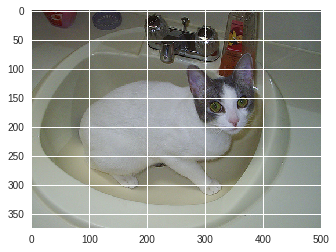

In [161]:
test_image = mpimg.imread(image_paths[200])
plt.imshow(test_image)

In [162]:
results = search_index_by_value(hybrid_images_features[223], word_index, word_mapping)
results

[[6676, 'bottle', 0.4371236264705658],
 [7494, 'bottles', 0.7600510120391846],
 [9716, 'glasses', 0.9916773438453674],
 [12780, 'cans', 1.0118842124938965],
 [15243, 'bottled', 1.046294927597046],
 [2847, 'glass', 1.0472034215927124],
 [16720, 'jar', 1.0564916133880615],
 [16748, 'sparkling', 1.0596128702163696],
 [20831, 'cocktails', 1.0893065929412842],
 [3754, 'plastic', 1.0964998006820679]]

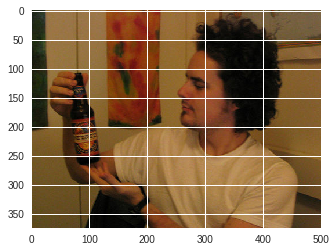

In [163]:
test_image = mpimg.imread(image_paths[223])
plt.imshow(test_image)

# Searching for images using text


In [166]:
image_index

In [167]:
len(file_mapping)

1000

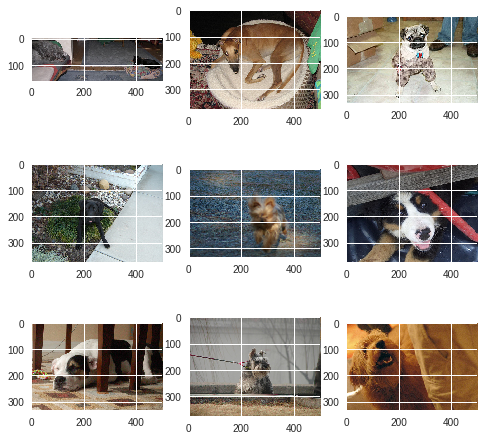

In [170]:
results = search_index_by_value(word_vectors["dog"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

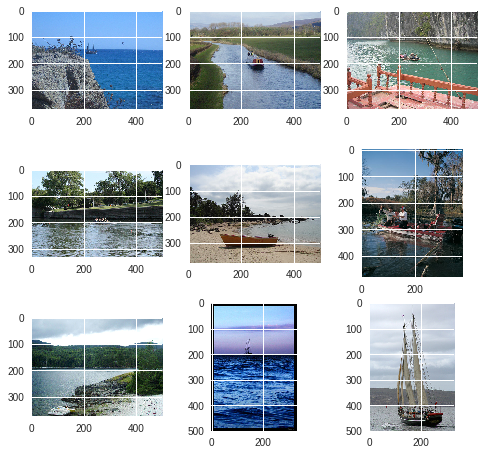

In [171]:
results = search_index_by_value(word_vectors["ocean"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

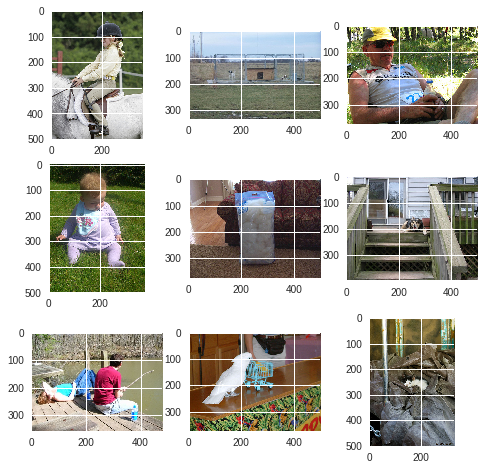

In [172]:
results = search_index_by_value(word_vectors["tree"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

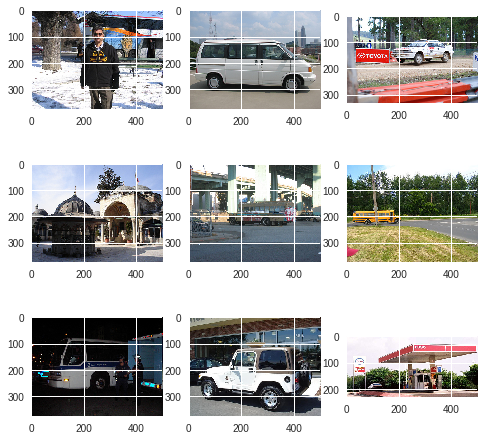

In [173]:
results = search_index_by_value(word_vectors["street"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

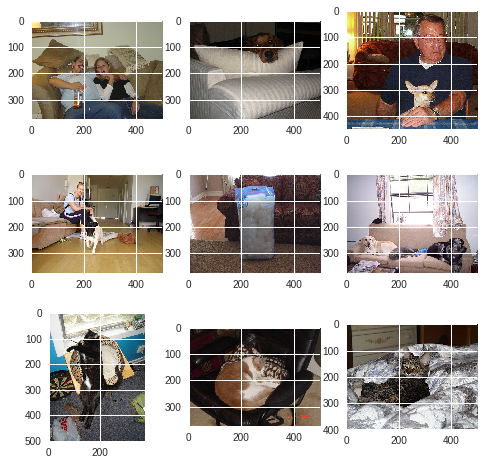

In [175]:
results = search_index_by_value(word_vectors["cat"] + word_vectors["sofa"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

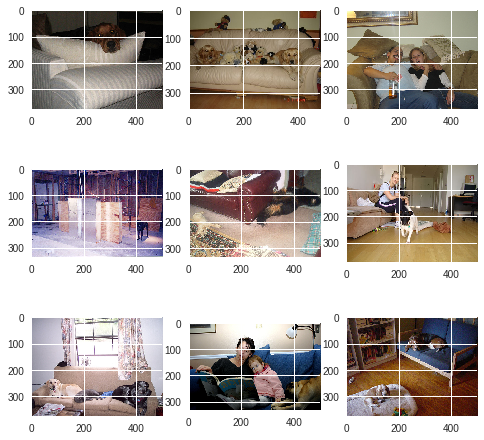

In [176]:
results = search_index_by_value(word_vectors["dog"] + word_vectors["sofa"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

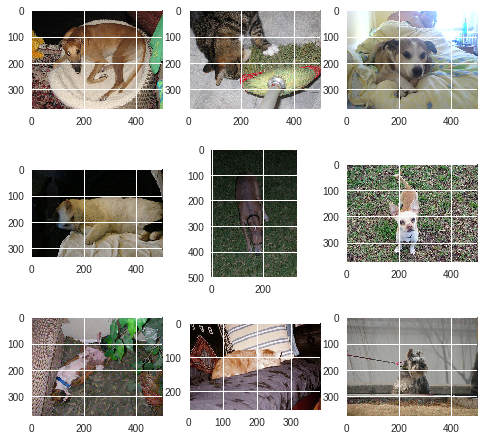

In [177]:
results = search_index_by_value(word_vectors["dog"] + word_vectors["cat"], hybrid_image_index, file_mapping)
results
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = mpimg.imread(results[i][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()